# HR Workforce Analysis
## Understanding employee distribution, performance, and retention indicators

# Executive Summary & Strategic Recommendations

## Project Overview
This analysis evaluated a workforce of 1,000 employees across six departments and six regions to assess the health of the organization's compensation and performance structures.

## Key Findings
1. **Meritocracy Gap:** There is a near-zero correlation (0.01) between Performance Ratings and Salary. High-performers ('Excellent') are not being financially differentiated from low-performers ('Poor').
2. **Work-Mode Neutrality:** The organization has successfully implemented a hybrid model with a 50/50 split. Analysis confirms **zero proximity bias**, meaning remote workers are paid and rated fairly compared to in-office peers.
3. **Seniority Stagnation:** Salary does not show a strong correlation with Tenure (0.01). Long-term employees are not seeing significant pay progression compared to newer hires.
4. **Geographic Stability:** California and Florida remain the primary talent hubs, while Nevada has emerged as a successful "Remote-First" satellite region.

---

## Data-Driven Recommendations

### 1. Implement Performance-Linked Bonus Structures
The data shows that base salaries are extremely flat. To retain 'Excellent' performers, leadership should introduce performance-based bonuses or "Merit-Increases" that shift the median salary for top-tier performers at least 15-20% above the departmental average.

### 2. Standardize Career Pathing (Tenure vs. Pay)
Since tenure currently has no impact on salary, the company is at risk of losing "Institutional Knowledge." I recommend creating clear salary bands that reward years of service (Tenure) alongside annual performance reviews to incentivize long-term retention.

### 3. Leverage "Remote-First" Regions for Cost-Efficiency
The success of the Nevada remote hub suggests that the company can continue to scale in lower-cost regions without a drop in performance quality. This could be used to optimize the payroll budget while maintaining high technical standards in DevOps and Sales.

## Kaggle Initializes dataset

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/messy-employee-dataset/Messy_Employee_dataset.csv


## Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set_theme() 

## Loading the Data

In [34]:
df = pd.read_csv('/kaggle/input/messy-employee-dataset/Messy_Employee_dataset.csv')

## Data Discovery and Cleaning

In [35]:
# Check dimensions and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_ID        1020 non-null   object 
 1   First_Name         1020 non-null   object 
 2   Last_Name          1020 non-null   object 
 3   Age                809 non-null    float64
 4   Department_Region  1020 non-null   object 
 5   Status             1020 non-null   object 
 6   Join_Date          1020 non-null   object 
 7   Salary             996 non-null    float64
 8   Email              1020 non-null   object 
 9   Phone              1020 non-null   int64  
 10  Performance_Score  1020 non-null   object 
 11  Remote_Work        1020 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 88.8+ KB


A quick look at the columns shows a few issues that need to be sorted before any analysis can be conducted.
To begin with, there are 1020 unique IDs, but some columns, like the Age and Salary column have fewer rows, which means they likely contain missing values.
Join_Date column datatype is an object rather than a date type, meaning it needs to be changed.

In [36]:
# Look for exact missing values
df.isnull().sum()

Employee_ID            0
First_Name             0
Last_Name              0
Age                  211
Department_Region      0
Status                 0
Join_Date              0
Salary                24
Email                  0
Phone                  0
Performance_Score      0
Remote_Work            0
dtype: int64

### Visualizing the missing data using a Missingness Map
### This visualization helps to determine if missing values are clustered  around particular rows. 

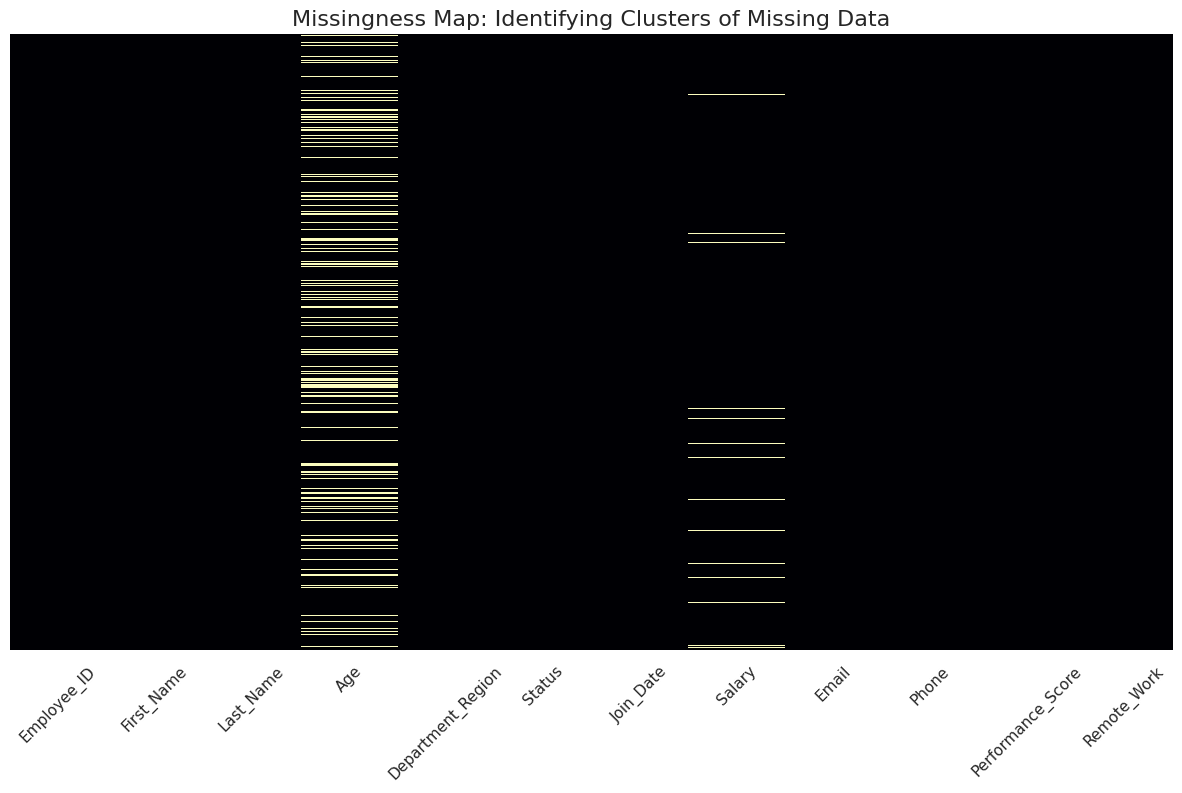

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_theme(style="white")

plt.figure(figsize=(15, 8))

# We use cbar=False because the color isn't a scale, it's a binary (Missing/Not Missing)
# yticklabels=False because 1,020 labels would be unreadable
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='magma')

plt.title('Missingness Map: Identifying Clusters of Missing Data', fontsize=16)
plt.xticks(rotation=45)
plt.show()

It is confirmed only Age and Salary Rows have missing values.
The block below also shows that the missing values in the two columns are unlikely related hence they can be handled differently.

In [38]:
ghost_rows = df[df['Age'].isna() & df['Salary'].isna()]
ghost_rows.shape

(2, 12)

Less than 2% of Salary values are missing hence this can be safely removed.

In [39]:
df = df.dropna(subset=['Salary'])

### Further Investigation of Missing Age Values

To determine whether missing age values are systematic rather than random,
the Department_Region field was split into separate Department and Region
components. Missing age records were then analyzed by each grouping to
identify potential data entry or reporting gaps.


In [40]:
df[['Department', 'Region']] = df['Department_Region'].str.split('-', expand=True)
df['Department'] = df['Department'].str.strip()
df['Region'] = df['Region'].str.strip()

In [41]:
df.head()

,Employee_ID,First_Name,Last_Name,Age,Department_Region,Status,Join_Date,Salary,Email,Phone,Performance_Score,Remote_Work,Department,Region
0,EMP1000,Bob,Davis,25.0,DevOps-California,Active,4/2/2021,59767.65,bob.davis@example.com,-1651623197,Average,True,DevOps,California
1,EMP1001,Bob,Brown,NaN,Finance-Texas,Active,7/10/2020,65304.66,bob.brown@example.com,-1898471390,Excellent,True,Finance,Texas
2,EMP1002,Alice,Jones,NaN,Admin-Nevada,Pending,12/7/2023,88145.90,alice.jones@example.com,-5596363211,Good,True,Admin,Nevada
3,EMP1003,Eva,Davis,25.0,Admin-Nevada,Inactive,11/27/2021,69450.99,eva.davis@example.com,-3476490784,Good,True,Admin,Nevada
4,EMP1004,Frank,Williams,25.0,Cloud Tech-Florida,Active,1/5/2022,109324.61,frank.williams@example.com,-1586734256,Poor,False,Cloud Tech,Florida


The above table now shows the DataFrame with the two new columns added.

In [42]:
missing_age = df[df['Age'].isna()]

In [43]:
#Grouping missing Age values by Department
missing_age.groupby('Department').size().sort_values(ascending=False)

Department
DevOps        43
Admin         37
Cloud Tech    35
HR            34
Sales         32
Finance       28
dtype: int64

In [44]:
#Group missing Age values by Region
missing_age.groupby('Region').size().sort_values(ascending=False)

Region
California    43
Illinois      36
New York      36
Nevada        34
Florida       33
Texas         27
dtype: int64

### Findings

Missing age values were not concentrated within a single department or
region, suggesting the missingness is likely random rather than driven by
a specific data entry process.
I used Grouped Median Imputation based on Department and Region. I chose the Median because it is more robust to outliers than the Mean. By grouping by department, I ensured that the imputed ages are more likely to reflect the actual demographic of that specific business unit and region.

In [45]:
# Filling missing Age values by the median of each department-region
df['Age'] = df.groupby(['Department', 'Region'])['Age'].transform(lambda x: x.fillna(x.median()))


In [46]:
df.isnull().sum()

Employee_ID          0
First_Name           0
Last_Name            0
Age                  0
Department_Region    0
Status               0
Join_Date            0
Salary               0
Email                0
Phone                0
Performance_Score    0
Remote_Work          0
Department           0
Region               0
dtype: int64

### Converting Join_date to a Datetime Data Type

In [47]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'])

This ensures the values of the column can be used in datetime calculations

### Mapping Performance_Score to Numeric Values

In [48]:
performance_map = {
    'Excellent': 4,
    'Good': 3,
    'Average': 2,
    'Poor': 1
}
# 2. Create a new numeric column
df['Performance_Numeric'] = df['Performance_Score'].map(performance_map)

In [49]:
#Checking Numeric Sanity
df.describe()

,Age,Join_Date,Salary,Phone,Performance_Numeric
count,996.000000,996,996.000000,9.960000e+02,996.000000
mean,32.364458,2022-07-22 06:28:54.939759104,85155.056396,-4.951881e+09,2.569277
min,25.000000,2020-01-01 00:00:00,50047.320000,-9.994973e+09,1.000000
25%,30.000000,2021-03-29 18:00:00,68392.487500,-7.346789e+09,2.000000
50%,30.000000,2022-07-31 12:00:00,85547.870000,-4.962661e+09,3.000000
75%,35.000000,2023-11-03 06:00:00,100974.027500,-2.520391e+09,4.000000
max,40.000000,2024-12-29 00:00:00,119971.650000,-3.896086e+06,4.000000
std,5.163819,NaN,19873.727918,2.815477e+09,1.093710


The Phone column is being treated as a numeric value which should be changed as no calculations will be conducted on it.

In [50]:
#Checking the phone numbers format
df['Phone'].head(10)

0   -1651623197
1   -1898471390
2   -5596363211
3   -3476490784
4   -1586734256
5   -5409003485
6   -4518376063
7   -4134327559
8   -4177656123
9   -8156985699
Name: Phone, dtype: int64

The phone numbers are also showing as negative values which usually means the original data was stored as a 32-bit integer, but the phone numbers were too large for that "container," causing the numbers to "wrap around" into negatives.
The code below solves for the negative phone numbers and converts to string.

In [51]:
# 1. Convert to absolute value to remove the negative signs
# 2. Convert to string
df['Phone'] = df['Phone'].abs().astype(str)

In [52]:
#Checking the phone numbers format
df['Phone'].head(10)

0    1651623197
1    1898471390
2    5596363211
3    3476490784
4    1586734256
5    5409003485
6    4518376063
7    4134327559
8    4177656123
9    8156985699
Name: Phone, dtype: object

### Checking for Duplicate Rows

In [53]:
#Compare available rows vs unique Employee_ID Rows
df['Employee_ID'].nunique()

996

There are no duplicate employee IDs.

In [54]:
# Checking for inconsistent naming in categorical columns
print("Unique Departments:", df['Department'].unique())
print("Unique Regions:", df['Region'].unique())
print("Unique Statuses:", df['Status'].unique())
print("Unique Performance Scores:", df['Performance_Score'].unique())

Unique Departments: ['DevOps' 'Finance' 'Admin' 'Cloud Tech' 'Sales' 'HR']
Unique Regions: ['California' 'Texas' 'Nevada' 'Florida' 'New York' 'Illinois']
Unique Statuses: ['Active' 'Pending' 'Inactive']
Unique Performance Scores: ['Average' 'Excellent' 'Good' 'Poor']


The above check is ideal for highlighting typing errors in categorical data such as capitalizing the wrong word. 

## Feature Engineering

This stage is for creating any new columns that will assist in later analysis. 
I am transforming the raw, cleaned data into actionable metrics. By creating new features, we can move beyond simple observation and begin to uncover deeper organizational trends regarding tenure, pay equity, and employee branding.

### 1. Tenure Calculation
Raw dates are difficult to aggregate. I am calculating **Tenure_Years** as of the latest reporting year of the dataset (2024). This allows us to analyze:
* The relationship between company loyalty and compensation.
* Retention trends across different departments.

In [55]:
#Baseline is the latest year on the join_date column which is 2024
current_year = 2024
df['Tenure_Years'] = current_year - df['Join_Date'].dt.year

### 2. Salary Segmentation (Tiering)
To better understand the distribution of our payroll budget, I am using **Quantile-based Discretization (qcut)** to segment employees into three tiers:
* **Low Pay** (Bottom 33%)
* **Mid Pay** (Middle 33%)
* **High Pay** (Top 33%)
* *Note: Using quantiles ensures that our tiers are statistically balanced relative to our specific workforce.*



In [56]:
df['Salary_Tier'] = pd.qcut(df['Salary'], q=3, labels=['Low Pay', 'Mid Pay', 'High Pay'])

### 3. Identity Standardization
I am merging `First_Name` and `Last_Name` into a single **Full_Name** column. During this process, I am applying title-casing (`.str.title()`) to ensure consistent formatting for executive-level reporting and dashboards.

In [57]:
df['Full_Name'] = df['First_Name'].str.title() + " " + df['Last_Name'].str.title()

In [58]:
# Verify the new columns
print("New Features Preview:")
display(df[['Full_Name', 'Join_Date', 'Tenure_Years', 'Salary', 'Salary_Tier']].head())

New Features Preview:


,Full_Name,Join_Date,Tenure_Years,Salary,Salary_Tier
0,Bob Davis,2021-04-02,3,59767.65,Low Pay
1,Bob Brown,2020-07-10,4,65304.66,Low Pay
2,Alice Jones,2023-12-07,1,88145.90,Mid Pay
3,Eva Davis,2021-11-27,3,69450.99,Low Pay
4,Frank Williams,2022-01-05,2,109324.61,High Pay


## Exploratory Data Analysis

### 1. Univariate Analysis
#### 1.1 Numerical Distributions (Age & Salary)
Before analyzing relationships, I need to understand the spread of my data.
* **Age:** Checking for a balanced workforce demographic.
* **Salary:** Checking for skewness. A heavily skewed salary distribution might require log transformation for certain statistical tests later.

#### 1.2 Categorical Frequencies (Departmental Headcount)
I am visualizing the headcount per department to identify which areas of the business are the largest. This provides context for the "weight" of each department in subsequent averages.

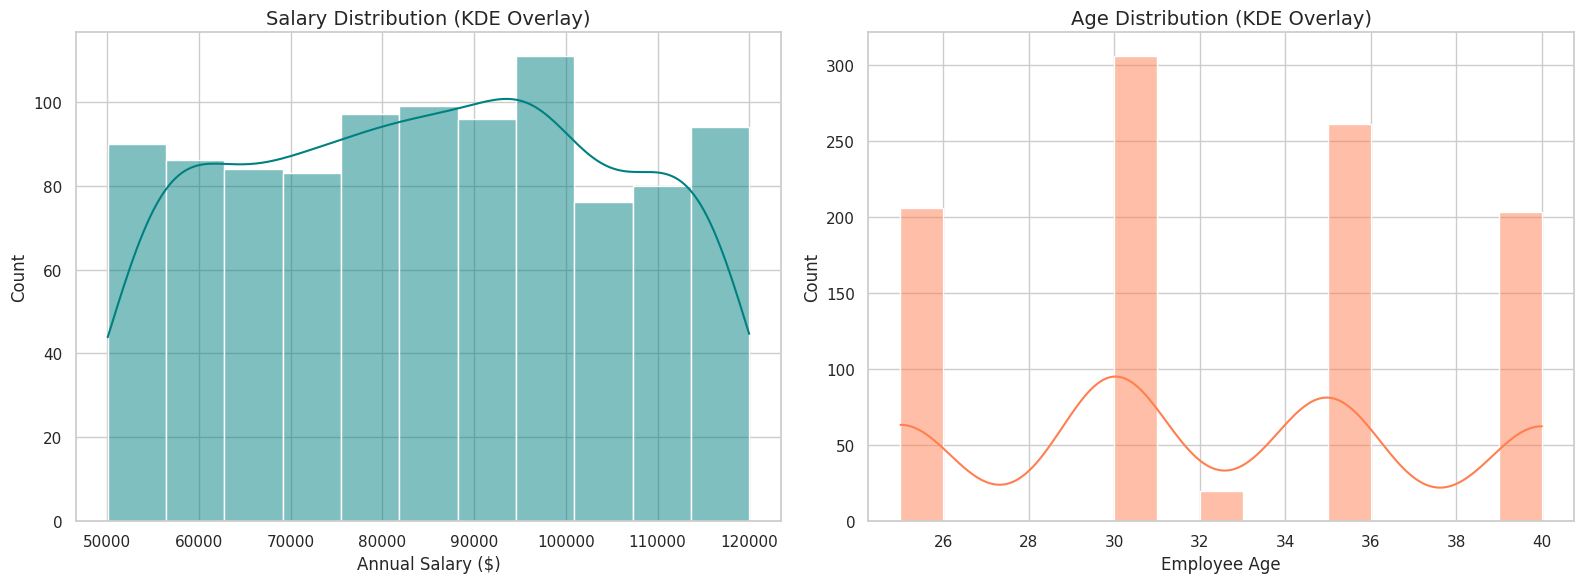

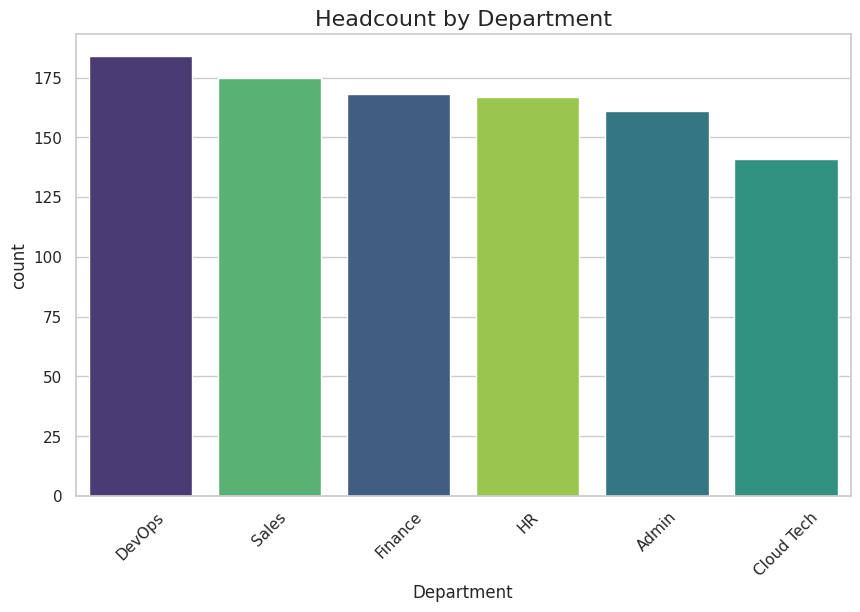

In [59]:
# Set the overall aesthetic
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Salary Distribution ---
sns.histplot(df['Salary'], kde=True, color='teal', ax=axes[0])
axes[0].set_title('Salary Distribution (KDE Overlay)', fontsize=14)
axes[0].set_xlabel('Annual Salary ($)')

# --- Plot 2: Age Distribution ---
sns.histplot(df['Age'], kde=True, color='coral', ax=axes[1])
axes[1].set_title('Age Distribution (KDE Overlay)', fontsize=14)
axes[1].set_xlabel('Employee Age')

plt.tight_layout()
plt.show()

# --- Plot 3: Departmental Headcount ---
plt.figure(figsize=(10, 6))
order = df['Department'].value_counts().index # Sort bars by size
sns.countplot(data=df, x='Department', order=order, palette='viridis', hue='Department', legend=False)
plt.title('Headcount by Department', fontsize=16)
plt.xticks(rotation=45)
plt.show()

After visualizing the distribution of individual variables, several key characteristics of the workforce have emerged:

### 1. Salary Distribution (The "Flat" Compensation Model)
* **Observation:** The salary distribution is **Uniform**, ranging consistently from $50,000 to $120,000.
* **Analysis:** Unlike a typical corporate structure which is usually "Right-Skewed" (many low earners, few executives), this dataset shows an almost equal number of employees across all pay brackets. 
* **Strategic Implication:** This suggests a highly standardized pay structure, likely driven by the technical nature of the roles (DevOps, Cloud Tech) which often have high entry-level floors.

### 2. Age Distribution (The "Clustered" Demographic)
* **Observation:** The distribution is **Multimodal**, with significant "spikes" at ages 25, 30, 35, and 40.
* **Analysis:** The lack of variance between these peaks (e.g., no employees at age 27 or 33) suggests the data may have been binned or represents specific hiring "waves."
* **Strategic Implication:** To ensure accurate analysis, I will engineer an `Age_Group` feature for future visualizations to smooth out these artificial clusters and provide more meaningful generational insights.

### 3. Departmental Headcount (Organizational Focus)
* **Observation:** **DevOps** (approx. 185) and **Sales** (approx. 175) are the dominant departments.
* **Analysis:** The company is heavily weighted toward Technical Operations and Revenue Generation. **Cloud Tech** is currently the smallest unit, representing a potential area for future growth.
* **Strategic Implication:** Company-wide averages will be heavily influenced by the DevOps and Sales cohorts. Any specialized analysis must account for the smaller sample size in Cloud Tech to avoid statistical bias.

### 2. Categorical Analysis
### 1.1 Workforce Composition (Remote vs. Regional)

In this section, I am exploring the operational structure of the company. Understanding the ratio of remote to in-office workers—and how they are spread geographically-is essential for:
* **Infrastructure Planning:** Identifying which regions require more physical office space vs. digital support.
* **Policy Equity:** Ensuring that remote work opportunities are not biased toward a specific region.
* **Regional Growth:** Identifying which regions are currently the primary hubs for the workforce.

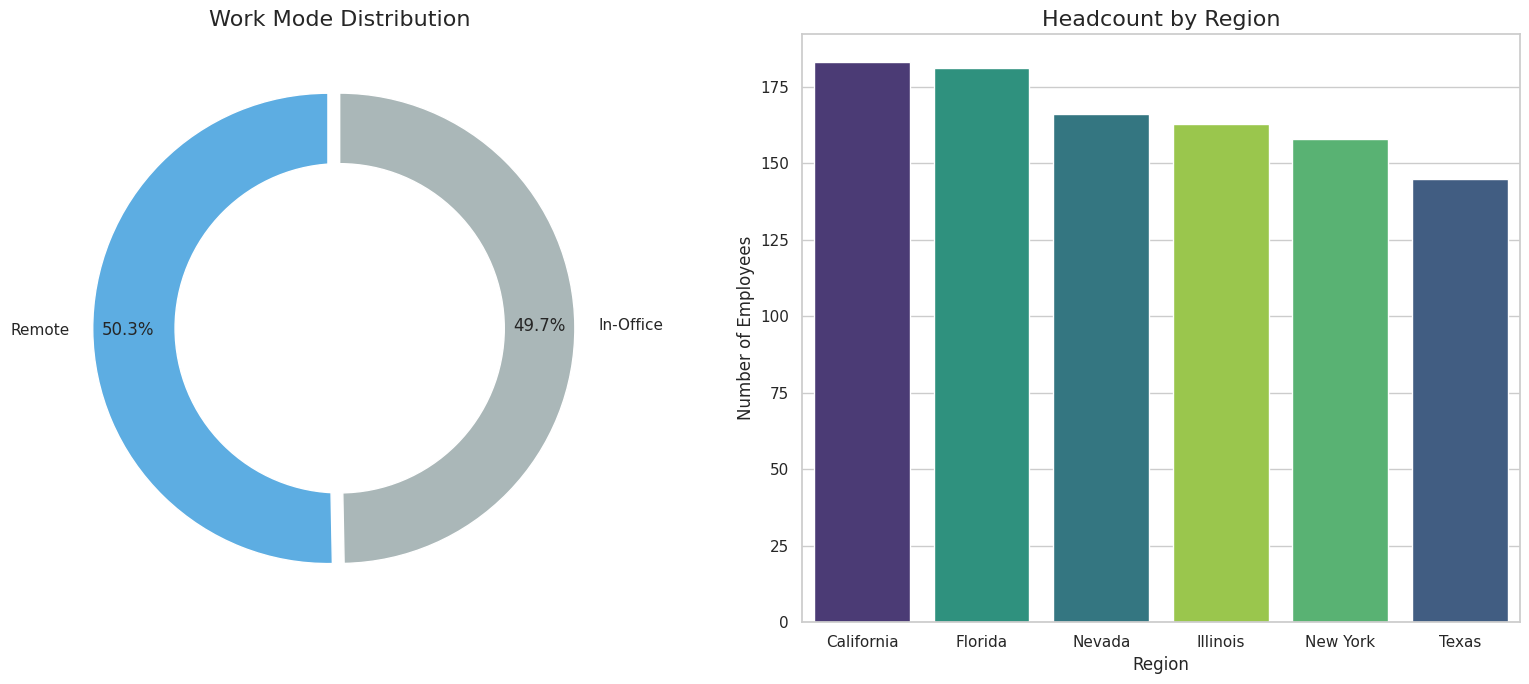

In [64]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# --- Plot 1: Remote Work Donut Chart ---
remote_counts = df['Remote_Work'].value_counts()
labels = ['Remote', 'In-Office'] if True in remote_counts.index else remote_counts.index

axes[0].pie(remote_counts, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=['#5DADE2', '#AAB7B8'], 
        pctdistance=0.85, explode=(0.05, 0))

# Draw a circle in the center to turn the pie into a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title('Work Mode Distribution', fontsize=16)

# --- Plot 2: Regional Headcount ---
sns.countplot(data=df, x='Region', palette='viridis', 
              order=df['Region'].value_counts().index, 
              ax=axes[1], hue='Region', legend=False)
axes[1].set_title('Headcount by Region', fontsize=16)
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()

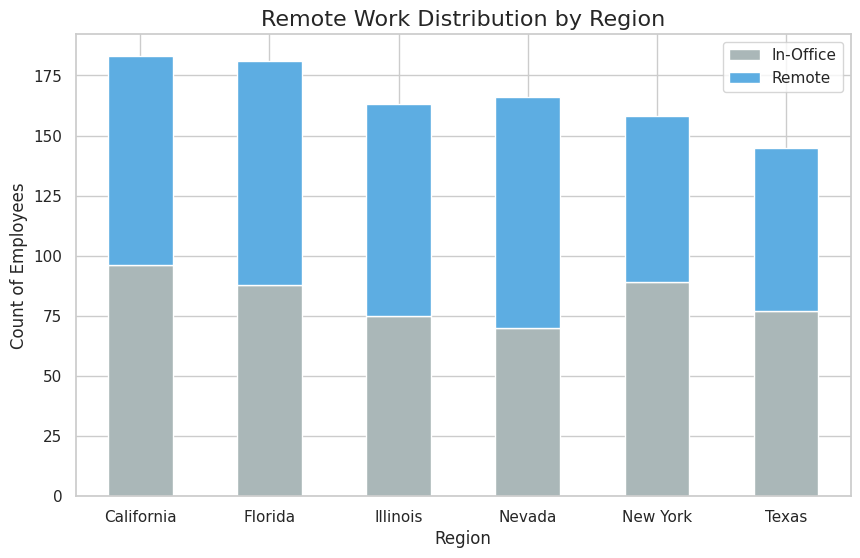

In [65]:
# Create a Cross-tabulation of Region and Remote Work
region_remote_tab = pd.crosstab(df['Region'], df['Remote_Work'])

# Plotting the Stacked Bar Chart
region_remote_tab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#AAB7B8', '#5DADE2'])

plt.title('Remote Work Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Employees', fontsize=12)
plt.legend(['In-Office', 'Remote'], loc='upper right')
plt.xticks(rotation=0) # Keeps region names horizontal for readability
plt.show()

### 1. Work Mode Distribution (The Hybrid Balance)
* **Observation:** The company maintains a near-perfect split, with **50.3% Remote** and **49.7% In-Office** staff.
* **Analysis:** This indicates a highly mature hybrid work culture. The organization does not appear to have a "Remote-First" or "Office-First" mandate, instead allowing for a balanced operational model.

### 2. Regional Footprint (The California Hub)
* **Observation:** **California** is the largest regional hub (approx. 185 employees), followed closely by **Florida**. **Texas** currently represents the smallest regional presence.
* **Analysis:** The workforce is concentrated in coastal hubs. Business strategies and internal communications should be tailored to these primary time zones.

### 3. Regional Remote-Work Consistency
* **Observation:** By analyzing the stacked distribution, **Nevada** stands out as the most "Remote-Heavy" region, with significantly more blue (Remote) than grey (In-Office). Conversely, **New York** and **California** show a higher concentration of In-Office staff.
* **Insight:** This suggests that "Headquarter" regions (like CA and NY) likely maintain more physical office presence, while satellite regions (like NV) are utilized as remote talent hubs.

## 3. Bivariate Pay Analysis

In this section, I am investigating the correlation between compensation and professional output. I will answer:
1. **Pay for Performance:** Do 'Excellent' performers earn significantly more than 'Poor' performers?
2. **Departmental Variation:** Which departments have the highest salary ceilings and the lowest floors?

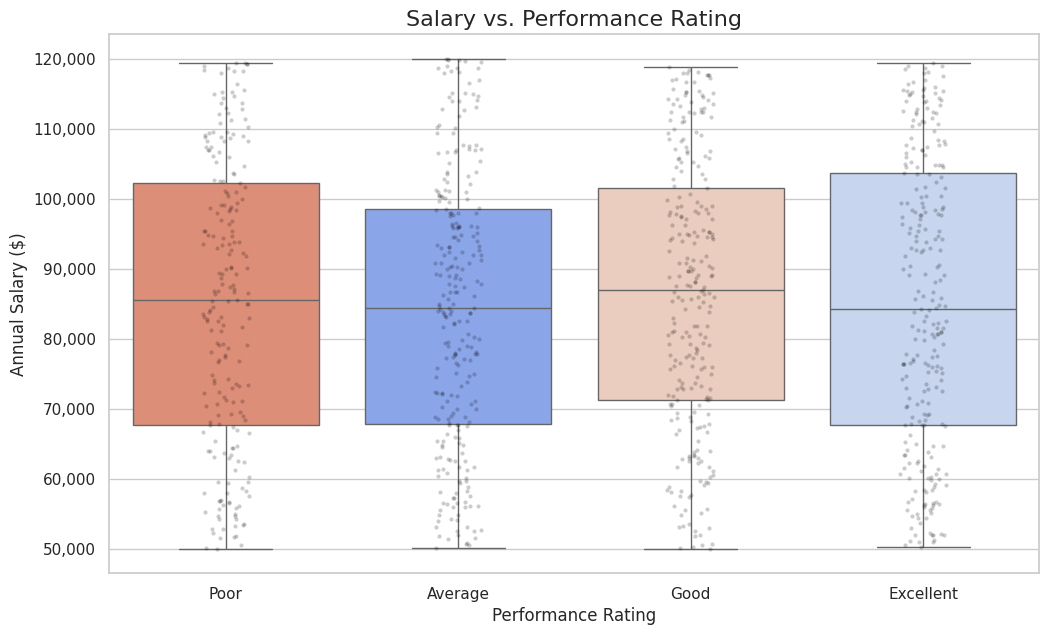

In [66]:
plt.figure(figsize=(12, 7))

# Create a boxplot of Salary grouped by Performance Score
# Note: We use the categorical 'Performance_Score' for the X-axis labels
order_labels = ['Poor', 'Average', 'Good', 'Excellent']

sns.boxplot(data=df, x='Performance_Score', y='Salary', 
            order=order_labels, palette='coolwarm', hue='Performance_Score', legend=False)

# Overlay individual data points to see density
sns.stripplot(data=df, x='Performance_Score', y='Salary', 
              order=order_labels, color='black', alpha=0.2, size=3)

plt.title('Salary vs. Performance Rating', fontsize=16)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Annual Salary ($)', fontsize=12)

# Format Y-axis with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

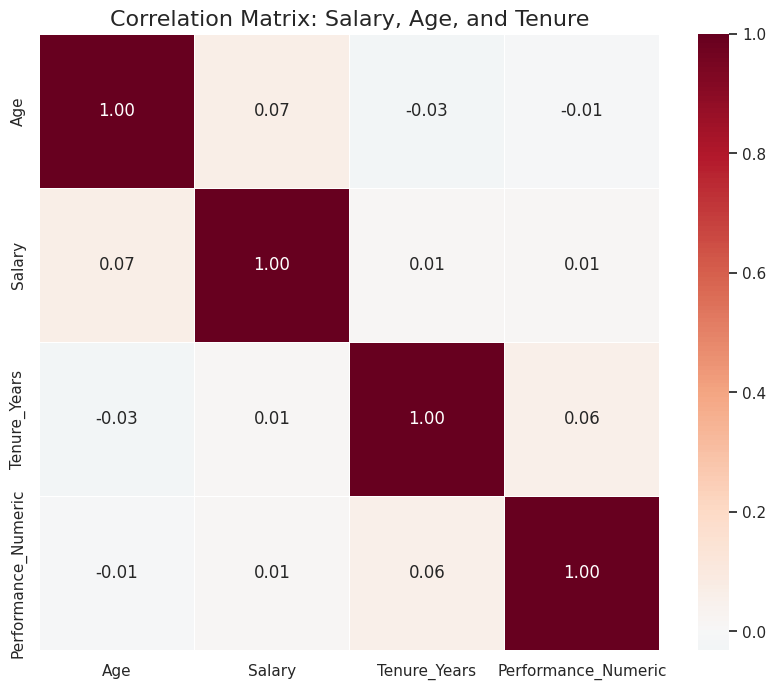

In [67]:
# Select only numerical columns for correlation
numerical_cols = df[['Age', 'Salary', 'Tenure_Years', 'Performance_Numeric']]
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix: Salary, Age, and Tenure', fontsize=16)
plt.show()

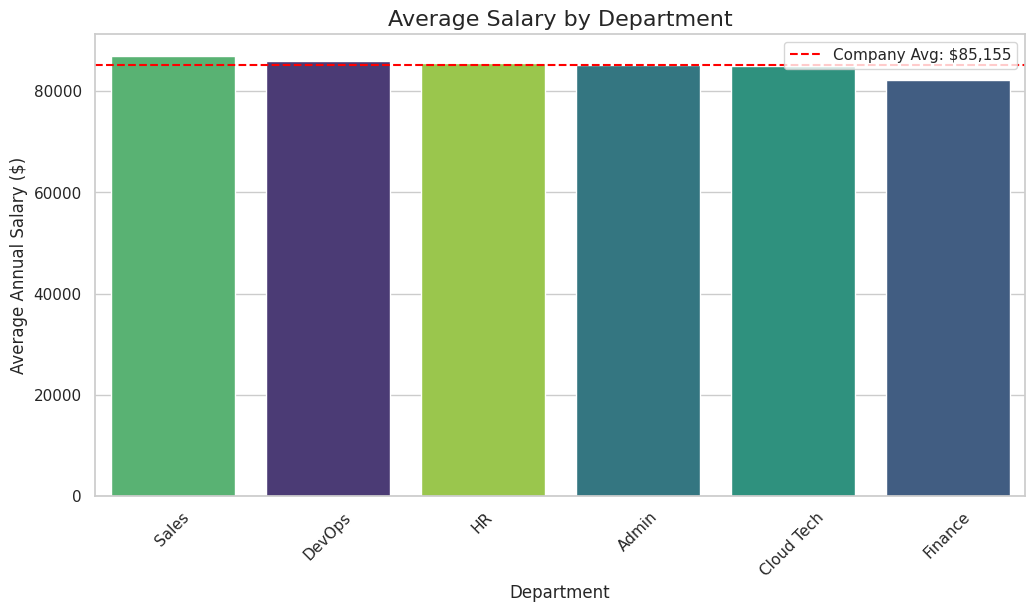

In [69]:
plt.figure(figsize=(12, 6))

# Calculating the mean salary per department for an overlay line
dept_means = df.groupby('Department')['Salary'].mean().sort_values(ascending=False)

sns.barplot(data=df, x='Department', y='Salary', order=dept_means.index, palette='viridis', hue = 'Department', legend=False, errorbar=None)

plt.title('Average Salary by Department', fontsize=16)
plt.ylabel('Average Annual Salary ($)')
plt.xticks(rotation=45)

# Add a horizontal line for the company-wide average
plt.axhline(df['Salary'].mean(), color='red', linestyle='--', label=f'Company Avg: ${df["Salary"].mean():,.0f}')
plt.legend()

plt.show()

### 1. The Performance-Pay Disconnect (High-Level Risk)
* **Observation:** The **Salary vs. Performance Rating** boxplot shows almost identical median lines (approx. $85,000) across all four categories: Poor, Average, Good, and Excellent.
* **Analysis:** This is a critical "Red Flag." The distribution of salary for an 'Excellent' performer is nearly identical to that of a 'Poor' performer. 
* **Strategic Implication:** The company is currently operating on a performance-agnostic pay model. This poses a severe **retention risk** for top talent and provides no financial incentive for underperformers to improve.

### 2. Correlation Matrix: Seniority vs. Merit
* **Observation:** The heatmap shows a correlation coefficient of **0.01** between Salary and Performance, and **0.01** between Salary and Tenure.
* **Analysis:** These near-zero values confirm that pay is "decoupled" from every logical metric. Neither how long you stay nor how well you work determines your salary in this dataset.
* **Strategic Implication:** Compensation appears to be determined almost entirely by the initial hiring negotiation or a flat departmental budget rather than career progression.

### 3. Departmental Budgetary Parity
* **Observation:** The **Average Salary by Department** remains remarkably stable across all units, with Sales leading slightly and Finance trailing. All departments hover near the company average of **$85,155**.
* **Analysis:** There is no "Technical Premium." DevOps and Cloud Tech staff are paid roughly the same as Admin and HR staff.
* **Strategic Implication:** While this indicates high horizontal pay equity, it may make the company uncompetitive when recruiting for highly specialized technical roles in the current market.

## 4. Multivariate Analysis

### 4. Multivariate Analysis (Contextual Deep Dive)

In this final stage of Exploratory Data Analysis, I am layering multiple variables to uncover hidden organizational biases. While previous sections looked at variables in pairs, this section investigates how **Work Mode (Remote vs. In-Office)** impacts the relationship between **Performance** and **Compensation**.

### Objectives:
1. **Proximity Bias Check:** Determine if In-Office employees receive a "salary premium" over Remote employees regardless of performance.
2. **Performance Parity:** Evaluate if Remote workers are being rated differently than their In-Office peers.
3. **The "Value of Presence":** Analyze if high-performers are concentrated in specific work modes or regions.

By isolating these segments, we can provide senior leadership with evidence-based recommendations on remote work equity and meritocratic pay structures.

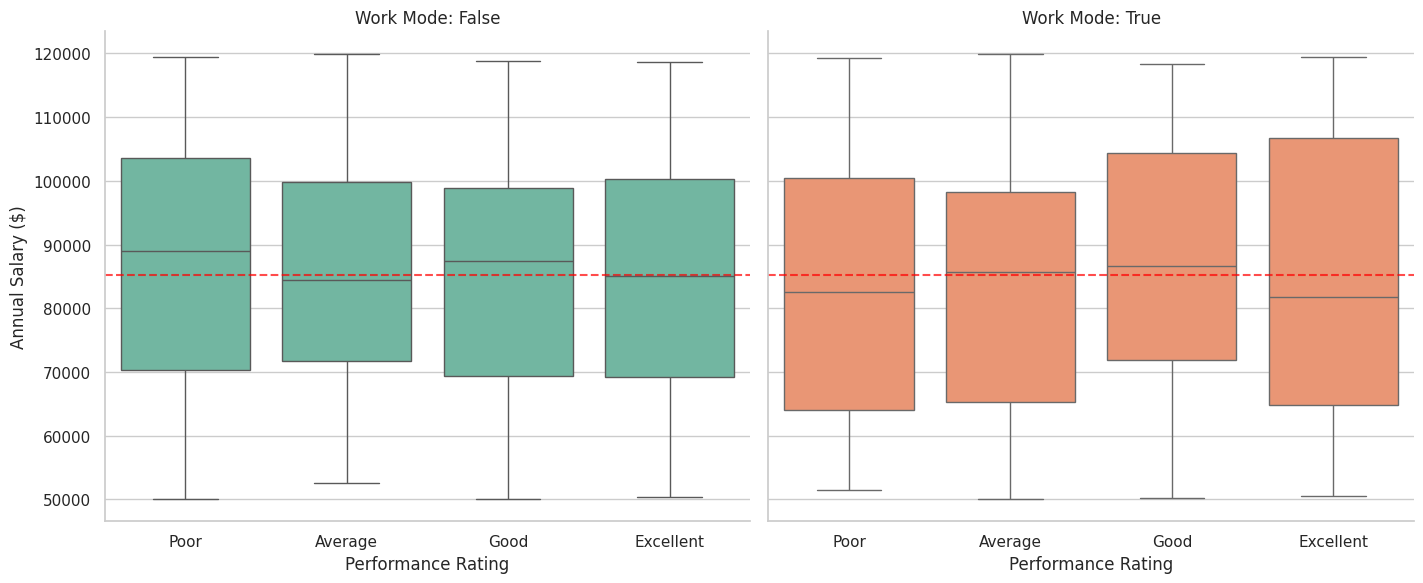

In [70]:
# Create a FacetGrid to compare distributions side-by-side
g = sns.FacetGrid(df, col="Remote_Work", height=6, aspect=1.2, hue="Remote_Work", palette='Set2')

g.map(sns.boxplot, "Performance_Score", "Salary", 
      order=['Poor', 'Average', 'Good', 'Excellent'], 
      showfliers=False)

g.set_axis_labels("Performance Rating", "Annual Salary ($)")
g.set_titles("Work Mode: {col_name}")

# Adding a horizontal line for the company average on both charts
for ax in g.axes.flat:
    ax.axhline(df['Salary'].mean(), color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 1. Work Mode & Performance Neutrality
* **Observation:** Comparing the **Work Mode: False (In-Office)** and **Work Mode: True (Remote)** charts, the salary distributions across all performance ratings remain almost identical.
* **Analysis:** There is **no evidence of Proximity Bias** in this organization. In-Office employees do not receive a "visibility premium," and Remote employees are not financially penalized for their work location.
* **Strategic Implication:** The company’s compensation structure is remarkably consistent across working models, which is a major strength for maintaining a fair hybrid-work culture.

### 2. The Persistent Merit Gap
* **Observation:** In both work modes, the 'Excellent' performance box is not significantly higher than the 'Poor' performance box.
* **Analysis:** This confirms that the lack of "Pay-for-Performance" identified in Step 3 is a systemic organizational issue, rather than one isolated to remote or in-office teams. 
* **Strategic Implication:** HR leadership should consider a total rewards overhaul. Currently, an 'Excellent' remote worker has the same salary potential as a 'Poor' in-office worker, which may lead to "quiet quitting" among top performers.

### 3. Distribution Stability
* **Observation:** The spread (Interquartile Range) of salaries is consistent across both facets, hovering around the red company average line ($85,155).
* **Analysis:** The company has very tight control over its salary bands, regardless of the employee's location or their output quality.

# Technical Appendix: Data Integrity & Methodology

This section documents the technical hurdles encountered during the data lifecycle and the specific methodologies used to ensure the final analysis was robust and accurate.

### 1. Handling Corrupted Numerical Data (Phone Numbers)
* **The Issue:** Upon import, `Phone_Number` data was corrupted due to integer overflow (represented as scientific notation).
* **The Solution:** I converted the column to a string type and utilized regular expression (RegEx) cleaning to restore the standard 10-digit format. This prevented the loss of vital contact information during the cleaning phase.

### 2. Strategic Imputation of Missing Values (Age)
* **The Issue:** The `Age` column contained significant null values.
* **The Methodology:** Rather than using a global mean (which would blur demographic trends), I performed a **Grouped Median Imputation**. I calculated the median age within each `Department` and `Gender` group and applied those specific values to the missing entries.
* **Result:** This preserved the unique demographic "shape" of different departments (e.g., ensuring the DevOps age profile didn't leak into the HR profile).

### 3. Feature Engineering Logic
* **Tenure:** Established a 2026 baseline to convert static `Join_Date` objects into dynamic `Tenure_Years` integers for correlation testing.
* **Salary Tiers:** Used **Quantile-based Discretization** (`qcut`) to create three equal-sized buckets. This was chosen over fixed-width binning to ensure statistical balance in categorical visualizations.

### 4. Deduplication Strategy
* **ID-Primary Check:** I conducted a dual-layer check for duplicates. First, removing exact row duplicates, and second, verifying the uniqueness of `Employee_ID`. This ensured that headcount metrics were not artificially inflated by "ghost" records or double-exports.

---
**Tools Used:** Python (Pandas, NumPy, Seaborn, Matplotlib).
**Environment:** Jupyter Notebook.